## Introduction and Hypothesis

During the late 18th century and early 19th century, authors in the United States possessed the same literary heritage that writers in Great Britain did (Herschel Parker, in Norton Anothology of American Literature). Hence, American literature was influenced by European notions and parallel developments. After the war of 1812, there was an increasing desire to produce uniquely American literature and culture. However, American writers were not achieving the originality and uniqueness in their work to distinguish it from European literature. For example, Edward Fiorelli highlights the influence of the early works of John Neal in developing American style of literature: "He criticised Irving and Cooper for relying on old British conventions of authorship to frame American phenomena." Howard Mumford Jones talks more about the influence of European ideas in 19th century America (Howard Mumford Jones, 1935).

Nevertheless, Herschel Parker indicated that writers and readers in America started sensing elusive quality about its new American literature in the 1850s. The literature consists of topics including but not limited to "trauma of rapid change", "repeated physical uprootings", "making a success of failure", and "power of human beings to destroy nature". In the following analyses, we will test the following hypothesis by comparing and contrasting the text of American fiction before and after 1850: **American literature started to become unique and original after 1850 unlike the novels inspired by Europeans in previous years**. The objective of the study is to find if there is a significant difference between American fiction before and after 1850. The results can act as supporting evidence to Herschel Parker's claim about the change in American literature. 

## Corpus and Data
The corpus used includes 1,540 volumes representing 40% of the American fiction from 1789 to 1875. The data is sufficient to analyze any deviation in literature in the works of authors before and after 1850. The metadata were collected manually by a team of undergraduate students at the University of Notre Dame. The following portion of code provides some relevant descriptive statistics of the corpus.

In [234]:
# Creating and reading directories
import os
import pandas as pd

metadata_file = os.path.join('us_fiction', 'corpus_data.tsv')
text_dir      = os.path.join('us_fiction', 'us_texts')

metadata = pd.read_csv(
    metadata_file, 
    sep='\t',
    low_memory=False
).set_index('source_id')

In [235]:
# Novels Before 1850
novels_bf = metadata[metadata['pub_date'] <= 1850]
# Novels After 1850
novels_af = metadata[metadata['pub_date'] > 1850]

In [236]:
# Descriptive stats of novels before 1850
print("Total word count:", novels_bf['words'].sum())
novels_bf['words'].describe()

Total word count: 36824020


count    4.900000e+02
mean     7.515106e+04
std      8.293069e+04
min      6.633000e+03
25%      4.933500e+04
50%      6.833150e+04
75%      8.406825e+04
max      1.150556e+06
Name: words, dtype: float64

The corpus includes 490 novels in count published before 1850. The average word count of these novels is approximately 75,000. However, the maximum word count is 1,150,556 which can be a hindrance in the runtime of our methods if there are multiple novels of that length, especially when creating embedding matrices. The issue will be addressed in the preprocessing of the relevant section. 

In [212]:
# Descriptive stats of novels after 1850
print("Total word count:", novels_af['words'].sum())
novels_af['words'].describe()

Total word count: 79971988


count      1050.000000
mean      76163.798095
std       43933.157199
min        1667.000000
25%       48021.750000
50%       71069.000000
75%      102058.000000
max      322963.000000
Name: words, dtype: float64

The corpus includes 1050 novels in count published after 1850. The average word count of these novels is approximately 76,163. 

#### Limitations

The corpus is not completely ideal for the purpose of testing our hypothesis because all of the novels in the corpus are American. It would be interesting to compare American literature to English or German literature before and after 1850 to better analyze whether European literature's influence on American literature was decreasing over the years. Nevertheless, the corpus provided should be sufficient to check whether the change in American literature in the 19th century was significant. 

Moreover, the genre of the published novels such as crime, fantasy, romance, science, and etc. were not provided in the data. Even though it is not directly relevant to the hypothesis, it would be interesting to see if there were changes in the topics chosen by authors and which gernes were more reflective of truley American literature.

#### Selecting data

For the purposes of this analysis and limited computing power, it is not ideal to use the whole corpus. Therefore, novels with word counts over 250,000 are excluded from the analysis. 


In [237]:
# Removing rows with word count higher than 250,000
print("Rows Being Removed")
metadata[metadata['words'] > 250000]

Rows Being Removed


,author,title,pub_place,publisher,pub_date,gender,gender_guess,ethnicity,occupation,occupation_free,state_born,state_main,state_died,born,died,words
source_id,,,,,,,,,,,,,,,,
eaf265,"Mathews, Cornelius",The various writings of Cornelius Mathews [......,New York,Harper & Brothers,1843,M,0.0,White,Law,Lawyer,NY,NY,NY,1817.0,1889.0,321780
eaf417,"Willis, Nathaniel Parker",Dashes at life with a free pencil,New York,J.S. Redfield,1845,M,0.0,White,Editor-Critic-Journalist,Editor,ME,NY,NY,1806.0,1867.0,730192
eaf418,"Willis, Nathaniel Parker",The complete works of N.P. Willis,New York,J.S. Redfield,1846,M,0.0,White,Editor-Critic-Journalist,Editor,ME,NY,NY,1806.0,1867.0,1150556
eaf419,"Willis, Nathaniel Parker",The miscellaneous works of N.P. Willis,New York,J.S. Redfield,1847,M,0.0,White,Editor-Critic-Journalist,Editor,ME,NY,NY,1806.0,1867.0,600916
eaf420,"Willis, Nathaniel Parker",The prose works of N.P. Willis,Philadelphia,Carey & Hart,1849,M,0.0,White,Editor-Critic-Journalist,Editor,ME,NY,NY,1806.0,1867.0,1045756
Wright2-0408,"Buckingham, Henry A.","Harry Burnham, the young Continental, or, Memo...",New York,Burgess & Garrett,1851,M,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258794
Wright2-1740,"Moos, H. M.","Hannah, or, A glimpse of Paradise",Cincinnati,Literary Eclectic Publishing House,1868,M,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1836.0,1894.0,322963
Wright2-1785,"Newell, R. H.","Avery Gliburn, or, Between two fires",New York,G.W. Carleton,1867,M,0.0,White,Editor-Critic-Journalist,Editor,NY,NY,NY,1836.0,1901.0,275565


The rows being removed include more of the novels before 1850s which were already lower in count than novels after 1850s. However, this should not make much of a difference to the overall representation of American fiction representation. The descriptive statistics shown below do not change significantly than the ones shown in the previous section.

In [238]:
# New Metadata
metadata = metadata[metadata['words'] <= 250000]

In [239]:
# Novels Before 1850
novels_bf = metadata[metadata['pub_date'] <= 1850]
# Novels After 1850
novels_af = metadata[metadata['pub_date'] > 1850]

In [240]:
# Descriptive stats of novels before 1850
print("Total word count:", novels_bf['words'].sum())
novels_bf['words'].describe()

Total word count: 32974820


count       485.000000
mean      67989.319588
std       31271.879264
min        6633.000000
25%       48945.000000
50%       68217.000000
75%       83194.000000
max      242199.000000
Name: words, dtype: float64

In [241]:
# Descriptive stats of novels after 1850
print("Total word count:", novels_af['words'].sum())
novels_af['words'].describe()

Total word count: 79114666


count      1047.000000
mean      75563.195798
std       42510.780784
min        1667.000000
25%       47938.000000
50%       70620.000000
75%      101884.500000
max      247258.000000
Name: words, dtype: float64

The mean word counts of the two sets of novels dropped because we removed entries with very high word counts. However, the stays around the same for both sets: before 1850 novels' median drops from 68,331 to 68,217 and after 1850 novels' median drops from 71,069 to 70,620. The count of novels before 1850 dropped from 490 to 485 (-5) and after 1850 dropped from 1050 to 1047 (-3). **Nevertheless, majority of the data is still retained and being used for analysis except for texts from 8 novels out of 1,540 novels.**

#### Reading and Preparing Data

Files are read for the analysis of the whole corpus, novels before 1850, and novels after 1850 separately

In [242]:
# Reading files for entire dataset
files = [os.path.join(text_dir, novel) for novel in metadata.index.values]
docs = []
for file in files:
    with open(file, 'r', encoding='utf8') as f:
        text = f.read().split()
        docs.append(text)

In [243]:
# Reading files for novels before 1850
files_bf = [os.path.join(text_dir, novel) for novel in novels_bf.index.values]
docs_bf = []
for file in files_bf:
    with open(file, 'r', encoding='utf8') as f:
        text = f.read().split()
        docs_bf.append(text)

In [244]:
# Reading files for novels after 1850
files_af = [os.path.join(text_dir, novel) for novel in novels_af.index.values]
docs_af = []
for file in files_af:
    with open(file, 'r', encoding='utf8') as f:
        text = f.read().split()
        docs_bf.append(text)

## Methods and Discussion

#### Imports

In [175]:
# Imports
%matplotlib inline
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import euclidean_distances, cosine_distances, cosine_similarity
from sklearn.cluster import KMeans, SpectralClustering, DBSCAN, OPTICS, AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import TruncatedSVD
import spacy
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import warnings
from   sklearn.model_selection import cross_val_score, train_test_split
from   sklearn.neural_network import MLPClassifier

### Average Euclidean and Cosine Distances

We first begin by looking at the average euclidean and cosine distances between the two sets of corpus. Doing so will check if there is a difference in the average direction and average magnitude of the novels in vector space. 

In [245]:
# Vectorize novels before 1850
vectorizer_bf = TfidfVectorizer(
    input='filename', 
    encoding='utf-8',
    strip_accents='unicode',
    lowercase=True,
    stop_words='english',
    min_df=2, 
    max_df=0.9,
    binary=False, 
    norm='l2',
    use_idf=False,
    max_features=5000
)
matrix_bf = vectorizer_bf.fit_transform(files_bf)

In [246]:
# Vectorize novels after 1850
vectorizer_af = TfidfVectorizer(
    input='filename', 
    encoding='utf-8',
    strip_accents='unicode',
    lowercase=True,
    stop_words='english',
    min_df=2, 
    max_df=0.9,
    binary=False, 
    norm='l2',
    use_idf=False,
    max_features=5000
)
matrix_af = vectorizer_bf.fit_transform(files_af)

In [247]:
# Distances among novels before 1850
print("Distances among novels before 1850")
print()
print("Average Euclidean Distance:", np.mean(euclidean_distances(matrix_bf)))
print()
print("Average Cosine Distance:", np.mean(cosine_distances(matrix_bf)))

Distances among novels before 1850

Average Euclidean Distance: 1.2270537641813513

Average Cosine Distance: 0.7583689198552589


In [248]:
# Distances among novels after 1850
print("Distances among novels after 1850")
print()
print("Average Euclidean Distance:", np.mean(euclidean_distances(matrix_af)))
print()
print("Average Cosine Distance:", np.mean(cosine_distances(matrix_af)))

Distances among novels after 1850

Average Euclidean Distance: 1.2493908895367902

Average Cosine Distance: 0.784703248006464


In [249]:
# Distances between novels before 1850 and after 1850
print("Distances between novels before 1850 and after 1850")
print()
print("Average Euclidean Distance:", np.mean(euclidean_distances(matrix_bf, matrix_af)))
print()
print("Average Cosine Distance:", np.mean(cosine_distances(matrix_bf, matrix_af)))

Distances between novels before 1850 and after 1850

Average Euclidean Distance: 1.320215357340634

Average Cosine Distance: 0.8723299310173114


#### Results

Even though quantitative distances of textual data is not a state-of-the-art method to draw conclusions, the results do indicate a difference between the two sets of corpuses. We can see that the two sets of novels have a higher cosine and euclidean distances between each other as compared to the distance among their group of novels. The average euclidean and cosine distance between novels before 1850 and after 1850 can be increased by tweaking the parameteres, using different vectorizing or tokenization methods. However, methods used later in the analysis are more representative of the hypothesis being tested which is where such optimization methods are used. Nevertheless, the findings are not comprehensive enough to test the hypothesis completely, but do suggest a disparity between the novels published before 1850 and after 1850. Therefore, we can proceed with further analysis with this indication in mind. 

### Author Specific Example

Herschel Parker gives a couple of examples of famous writers who showed significant indication of unique American literature during the 1850s. For example, Herschel Parker quoutes, "In Melville's Moby-Dick was a sense of grandeur of the physical universe and man's role in it long suppressed in European consciousness." Melville was one of the examples that Herschel Parker gave when he recognized the change in American Literature in the 1850s. The following analysis focuses on whether if Melville's work changed as claimed by Herschel Parker.

In [250]:
# Selecting novels published by Melville Herman
novels_mh = metadata[metadata['author'] == 'Melville, Herman']
novels_mh = novels_mh.sort_values('pub_date')

In [251]:
# Range of publication years available in the dataset
print("Publication year ranges", novels_mh['pub_date'].min(), '-', novels_mh['pub_date'].max())

Publication year ranges 1846 - 1857


In [252]:
# Create a vectorizer for Melville Herman's novels
vectorizer_mh = TfidfVectorizer(
    input='filename', 
    encoding='utf-8',
    strip_accents='unicode',
    lowercase=True,
    stop_words='english',
    min_df=2, 
    max_df=0.9,
    binary=False, 
    norm='l2',
    use_idf=False,
)

files_mh = [os.path.join(text_dir, novel) for novel in novels_mh.index.values]

matrix_mh = vectorizer_bf.fit_transform(files_mh)

In [253]:
# Calculate euclidean distances
euc = euclidean_distances(matrix_mh)
np.around(euc, decimals = 2)

array([[0.  , 0.95, 1.22, 1.36, 1.31, 1.31, 1.33, 1.39, 1.38, 1.29, 1.34],
       [0.95, 0.  , 1.2 , 1.36, 1.16, 1.18, 1.29, 1.39, 1.35, 1.24, 1.32],
       [1.22, 1.2 , 0.  , 0.92, 1.3 , 1.31, 1.24, 1.34, 1.38, 1.28, 1.34],
       [1.36, 1.36, 0.92, 0.  , 1.38, 1.38, 1.35, 1.35, 1.4 , 1.36, 1.37],
       [1.31, 1.16, 1.3 , 1.38, 0.  , 1.14, 1.3 , 1.38, 1.35, 1.24, 1.29],
       [1.31, 1.18, 1.31, 1.38, 1.14, 0.  , 1.31, 1.39, 1.33, 1.25, 1.32],
       [1.33, 1.29, 1.24, 1.35, 1.3 , 1.31, 0.  , 1.35, 1.38, 1.3 , 1.35],
       [1.39, 1.39, 1.34, 1.35, 1.38, 1.39, 1.35, 0.  , 1.4 , 1.38, 1.36],
       [1.38, 1.35, 1.38, 1.4 , 1.35, 1.33, 1.38, 1.4 , 0.  , 1.36, 1.36],
       [1.29, 1.24, 1.28, 1.36, 1.24, 1.25, 1.3 , 1.38, 1.36, 0.  , 1.27],
       [1.34, 1.32, 1.34, 1.37, 1.29, 1.32, 1.35, 1.36, 1.36, 1.27, 0.  ]])

In [254]:
# Calculate cosine distances
cos = cosine_distances(matrix_mh)
np.around(cos, decimals = 2)

array([[0.  , 0.45, 0.75, 0.92, 0.86, 0.86, 0.88, 0.96, 0.95, 0.83, 0.89],
       [0.45, 0.  , 0.72, 0.93, 0.67, 0.7 , 0.83, 0.96, 0.91, 0.77, 0.87],
       [0.75, 0.72, 0.  , 0.42, 0.84, 0.86, 0.77, 0.9 , 0.95, 0.82, 0.89],
       [0.92, 0.93, 0.42, 0.  , 0.95, 0.95, 0.91, 0.91, 0.98, 0.93, 0.94],
       [0.86, 0.67, 0.84, 0.95, 0.  , 0.65, 0.84, 0.95, 0.91, 0.77, 0.84],
       [0.86, 0.7 , 0.86, 0.95, 0.65, 0.  , 0.86, 0.96, 0.89, 0.78, 0.87],
       [0.88, 0.83, 0.77, 0.91, 0.84, 0.86, 0.  , 0.91, 0.95, 0.84, 0.91],
       [0.96, 0.96, 0.9 , 0.91, 0.95, 0.96, 0.91, 0.  , 0.98, 0.95, 0.93],
       [0.95, 0.91, 0.95, 0.98, 0.91, 0.89, 0.95, 0.98, 0.  , 0.92, 0.92],
       [0.83, 0.77, 0.82, 0.93, 0.77, 0.78, 0.84, 0.95, 0.92, 0.  , 0.81],
       [0.89, 0.87, 0.89, 0.94, 0.84, 0.87, 0.91, 0.93, 0.92, 0.81, 0.  ]])

Euclidean distances


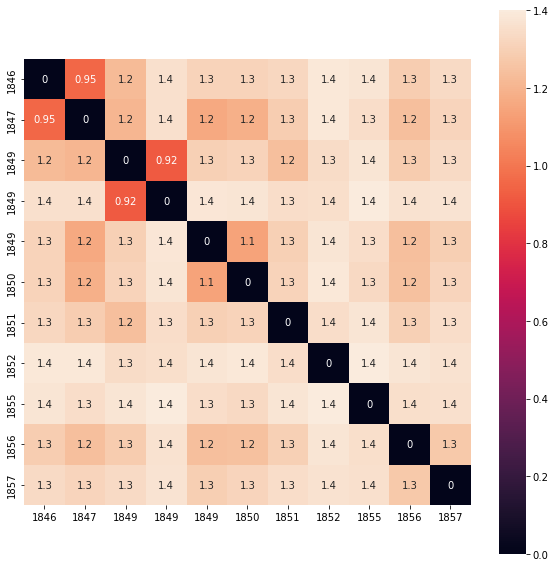

In [255]:
# Visualize euclidean distances
print("Euclidean distances")
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(
    euc,
    xticklabels = novels_mh['pub_date'],
    yticklabels = novels_mh['pub_date'],
    annot= True,
    square=True
);

Cosine distances


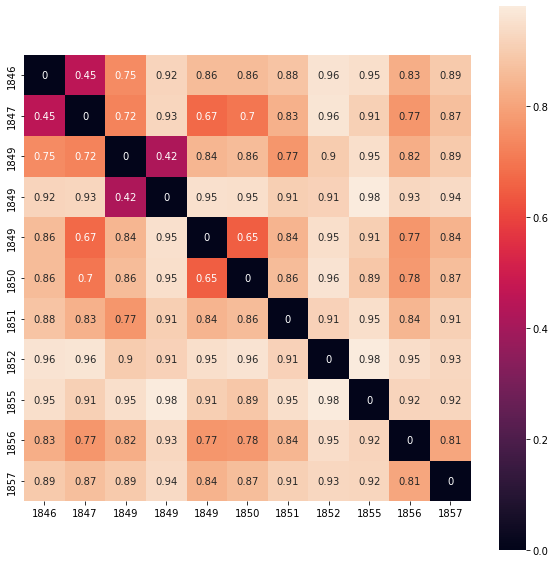

In [256]:
# Visualize cosine distances 
print("Cosine distances")
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(
    cos,
    xticklabels = novels_mh['pub_date'],
    yticklabels = novels_mh['pub_date'],
    annot=True,
    square=True
);

#### Results

The distances between the novels published by Melville Herman before and after 1850 are evident. This difference is seen more in the cosine distances where the cosine distances are as low as 0.45 among novels before 1850s. The distance between the novels before and after 1850 are not much highlighted in this analysis except for his publication in 1857 vs 1849 (cosine distance of 0.94). The publication in 1855 vs 1849 seemed the most far apart in vector space. This is one of the reasons why we do not place much importance on vector space distances as aforementioned in the previous results. 

### Unsupervised Learning Methods 

In this portion of the analysis, we will discuss why unsupervised machine learning methods are not appropriate for this analysis. Firstly, we have the labels for the publication dates to construct a supervised learning method (next part). Secondly, it would be difficult to evaluate the outcomes. For example, we construct hard clusters with 2 labels with the anticipation that the model will divide the data into clusters of before and after 1850. We cannot evaluate the labels without using the actual publication years of the novels which undermines the whole purpose of using an unsupervised model. It would have been easier to evaluate the results if we were aware of certain token features that are highly represented in unique American literature after the 1850s. But we do not have that information or at least are not that certain about such information. Therefore, it is better to proceed with supervised learning methods.

### Supervised Learning Methods 

Using supervised learning methods, we aim to predict the publication date to check if the textual information in the novels is enough for different machine learning models and/or classification methods to predict years correctly. This would be an indication that the text of these novels can be used as features to identify which ones belonged in the era where American literature was inspired by Europeans and which ones belong in the era where American authors were incorporating uniqueness and originality in their writings. 

We first run a standard token-based and word embedding-based classification using Logistic Regression because the output we are looking for is binary. Thereafter, we will attempt to fine-tune through different parameters and classification methods to improve evaluation scores of our results. The reason for tuning the models is to achieve the best possible result for the corpus and open opportunities for future studies. We use grid search to find the optimum parameters for functions. 

Overall, the reason why we believe supervised learning methods are the best to test the hypothesis that American literature changed after 1850 is because we are not that aware of the features that represent this change but we have desired outcome labels which we can use to train classifiers. Doing so will help us test the hypothesis and evaluate using different scoring methods by cross validation. 

#### Token-based Classifier

We start off by using a token-based classifier which we anticipate to be the most appropriate out of the other classification methods. The reason why we think so is because the length of the novels in the corpus is too large to run embedding-based classification and would require some modifications.

Nevertheless, we create labels for our models based on whether the publication date for the novels is before or after 1850. Although such labeling will not identify what made American literature unique after 1850, it will identify if there was a significant enough change visible in the textual information of these novels.

Please look out for explainations (markdowns) and comments (code cell) as we go through the code.

In [188]:
# Create binary labels based publication year before or after 1850
y_binary = [1 if date > 1850 else 0 for date in metadata['pub_date']]
print("y_binary length:", len(y_binary))

print("Naïve baseline accuracy:", np.sum(y_binary) / len(y_binary))

y_binary length: 1463
Naïve baseline accuracy: 0.6739576213260424


In [189]:
# Calculate baseline evaluation scores as a benchmark
baseline_accuracy = np.sum(y_binary)/len(y_binary)
baseline_precision = baseline_accuracy
baseline_recall = 1.0
baseline_f1 = 2*baseline_precision*baseline_recall/(baseline_precision+baseline_recall)
print("Baseline accuracy:", round(baseline_accuracy, 3))
print("Baseline F1:", round(baseline_f1, 3))

Baseline accuracy: 0.674
Baseline F1: 0.805


In [190]:
# Vectorize the entire corpus 
vectorizer = TfidfVectorizer(
    input='filename', 
    encoding='utf-8',
    strip_accents='unicode',
    lowercase=True,
    stop_words='english',
    min_df=0.1, 
    max_df=0.9,
    binary=False, 
    norm='l2',
    use_idf=False
)

matrix = vectorizer.fit_transform(files)
matrix.shape

(1463, 14193)

In [191]:
# Standardize the matrix
matrix = StandardScaler().fit_transform(matrix.todense())

C:\Users\Ahmad\miniconda3\envs\3350\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\Ahmad\miniconda3\envs\3350\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [257]:
# Select the most informative features 
method = mutual_info_classif
selector = SelectKBest(method, k=300)
matrix_best = selector.fit_transform(matrix, y_binary)

In [258]:
# Calculate accuracy and F-1 Score
print("Cross-validated accuracy:", np.mean(cross_val_score(LogisticRegression(), matrix_best, y_binary, scoring='accuracy', cv=10)))
print("Cross-validated F-1:", np.mean(cross_val_score(LogisticRegression(), matrix_best, y_binary, scoring='f1', cv=10)))

Cross-validated accuracy: 0.9049529400801418
Cross-validated F-1: 0.9298854327096414


In [259]:
# Compares scores of classifiers (function referenced from Mini-project Part 2)
def compare_scores(scores_dict):

    df = pd.DataFrame(scores_dict).T.applymap(np.mean).style.background_gradient(cmap='RdYlGn')
    return df

In [260]:
# Compare results using different classifiers (no tuning)
classifiers = {
    'kNN': KNeighborsClassifier(),
    'Logit':LogisticRegression(),
    'DTC': DecisionTreeClassifier(),
    'RFC':RandomForestClassifier(),
    'BNB': BernoulliNB(),
}

scores = {} 
for classifier in classifiers:
    scores[classifier] = cross_validate(
        classifiers[classifier],
        matrix_best, 
        y_binary, 
        cv=10, 
        scoring=['accuracy','precision', 'recall', 'f1']
    )
compare_scores(scores)

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
kNN,0.002463,0.008377,0.850862,0.842189,0.967584,0.898902
Logit,0.017188,0.003125,0.904953,0.925430,0.936147,0.929885
DTC,0.150776,0.001764,0.883734,0.912931,0.921965,0.915456
RFC,0.442771,0.005174,0.921964,0.918515,0.979716,0.946222
BNB,0.009375,0.003125,0.903550,0.918664,0.946341,0.930519


These are the inital results without any tuning of parameters. Based on the results, the Logistic Regression, Random Forest, and Bernoulli Naive Bayes classifiers showed high F-1, precision, and recall scores. Therefore, we will proceed to tune these classifiers using grid search to get the best possible evaluative scores.

In [261]:
# Tuning Logistic Regression
params = {
    'penalty': ['none', 'l1', 'l2','elasticnet'],
    'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter':[2000],
    'verbose': [0,1],
    'warm_start': [False, True],
}

clf = GridSearchCV(LogisticRegression(), params, n_jobs=-1, scoring='f1')

with warnings.catch_warnings() as w:
    warnings.simplefilter("ignore")
    clf.fit(matrix_best, y_binary)

print("Best paramters for Logistic Regression:", clf.best_params_)
print("Best score for Logisitc Regression:", clf.best_score_)

Best paramters for Logistic Regression: {'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear', 'verbose': 0, 'warm_start': False}
Best score for Logisitc Regression: 0.9437168445084525


In [262]:
# Tuning Random Forest Classifier
params = {
    'n_estimators': [10, 100, 1000],
    'criterion':['gini', 'entropy', 'log_loss'],
    'max_depth':[10, 100, 300],
    'verbose': [0,1],
    'warm_start': [False, True],
}

clf = GridSearchCV(RandomForestClassifier(), params, n_jobs=-1, scoring='f1')

with warnings.catch_warnings() as w:
    warnings.simplefilter("ignore")
    clf.fit(matrix_best, y_binary)

print("Best paramters for Random Forest Classifier:", clf.best_params_)
print("Best score for Random Forest Classifier:", clf.best_score_)

Best paramters for Random Forest Classifier: {'criterion': 'gini', 'max_depth': 100, 'n_estimators': 100, 'verbose': 0, 'warm_start': True}
Best score for Random Forest Classifier: 0.9470558190432247


In [263]:
# Tuning Bernoulli Naive Bayes Classifier
params = {
    'alpha': [0, 0.25, 0.5, 0.75, 1],
    'binarize':[None, 0.0, 0.5, 1.0],
    'fit_prior':[True, False],
}

clf = GridSearchCV(BernoulliNB(), params, n_jobs=-1, scoring='f1')

with warnings.catch_warnings() as w:
    warnings.simplefilter("ignore")
    clf.fit(matrix_best, y_binary)

print("Best paramters for Bernoulli Naive Bayes:", clf.best_params_)
print("Best score for Bernoulli Naive Bayes:", clf.best_score_)

Best paramters for Bernoulli Naive Bayes: {'alpha': 0, 'binarize': 0.0, 'fit_prior': False}
Best score for Bernoulli Naive Bayes: 0.9367641395917184


In [266]:
# Compare results using different classifiers (with tuning)
classifiers = {
    'Logit':LogisticRegression(max_iter= 2000, penalty= 'l1', solver= 'liblinear', verbose= 0, warm_start= False),
    'RFC':RandomForestClassifier(criterion= 'gini', max_depth= 100, n_estimators= 100, verbose= 0, warm_start= True),
    'BNB': BernoulliNB(alpha= 1.0e-10, binarize= 0.0, fit_prior= False),
}

scores = {} 
for classifier in classifiers:
    scores[classifier] = cross_validate(
        classifiers[classifier],
        matrix_best, 
        y_binary, 
        cv=10, 
        scoring=['accuracy','precision', 'recall', 'f1']
    )
compare_scores(scores)

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
Logit,0.032959,0.003124,0.914505,0.925636,0.952381,0.937973
RFC,0.478913,0.004764,0.914439,0.912468,0.974665,0.940765
BNB,0.007806,0.000000,0.879583,0.905453,0.929066,0.914510


After tuning the parameters of the best performing classifiers, we get two high F-1 scores by the Logistic Regression classifier (0.937) and by the Random Forest Classifier (0.940)

Below we attempt try the f_classif selector method instead of the mutual_info_classif selector method when selecting our most informative features.

In [265]:
# Trying alternative selector method

method = f_classif
selector = SelectKBest(method, k=300)
matrix_best = selector.fit_transform(matrix, y_binary)

scores = {} 
for classifier in classifiers:
    scores[classifier] = cross_validate(
        classifiers[classifier],
        matrix_best, 
        y_binary, 
        cv=10, 
        scoring=['accuracy','precision', 'recall', 'f1']
    )
compare_scores(scores)

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
Logit,0.038296,0.000600,0.914505,0.924743,0.953401,0.938046
RFC,0.477136,0.008590,0.909640,0.905380,0.976675,0.937869
BNB,0.007603,0.002300,0.879583,0.905453,0.929066,0.914510


As evident from the scores seen above, the selector method does not make much of a difference to our overall evaluation scores

#### Word-embedding Classifier

The word-embedding classifier conducted below required us to shorten the data we used as an input to the spacy vectorizer. This is because we were experiencing run times of over 6+ hours if we tried to use majority of the corpus.

In [194]:
# Load spacy library
nlp = spacy.load("en_core_web_lg")

In [195]:
# Choosing novels with less word count due to computational feasability

indexes = [index for index in metadata.index.values if metadata.loc[index]['words'] < 40000]
novels_em = metadata.loc[indexes]

In [196]:
# Creating golden labels
y_binary_em = [1 if date > 1850 else 0 for date in novels_em['pub_date']]

In [197]:
# Read files without tokenizing
files_em = [os.path.join(text_dir, novel) for novel in novels_em.index.values]
docs_em = []
for file in files_em:
    with open(file, 'r', encoding='utf8') as f:
        text = f.read()
        docs_em.append(text)

In [198]:
# Create function to get the mean of the word embedding vectors
def get_doc_embedding (text, nlp):
    doc = nlp(text)
    doc = [token for token in doc if not (token.is_stop or token.is_punct) and token.has_vector]
    word_emb = np.mean([token.vector for token in doc], axis=0)
    return word_emb

In [199]:
%%time
# Create word embedding matrix
matrix_embedding = np.asarray([get_doc_embedding(novel, nlp) for novel in docs_em])
print("Shape of resulting matrix:", matrix_embedding.shape)

Shape of resulting matrix: (293, 300)
Wall time: 57min 20s


In [200]:
# Standardize matrix
matrix_embedding = StandardScaler().fit_transform(matrix_embedding)

In [201]:
# Calculate accuracy and F-1 Score
print("Cross-validated accuracy", np.mean(cross_val_score(LogisticRegression(), matrix_embedding, y_binary_em, scoring='accuracy', cv=10)))
print("Cross-validated F-1", np.mean(cross_val_score(LogisticRegression(), matrix_embedding, y_binary_em, scoring='f1', cv=10)))

Cross-validated accuracy 0.8325287356321841
Cross-validated F-1 0.8865272913962589


The accuracy and F-1 scores are not as high as we had for our token-based classifier. This again is most likely because we were able to feed majority of the corpus to our token-based classifiers while we had to be selective about our data when running the word based classifier.

### Large Neural Networks

Another method of testing our hypothesis would be to use large neural networks such as Multilayer Perceptron, Recurrent Neural Networks, Bert, etc. However, the issue with large neural networks is that they require large amounts of training data to get the best value out of their algorithms. Also, our classification methods returned high enough scores to make statisitcally significant conclusions about our results. Nevertheless, we attempt to run a Multilayer Perceptron to find the scores that are returned. The code is inspired by the Neural Methods code from Lecture 24. 

In [202]:
mlpc = MLPClassifier()
mlp_scores = cross_val_score(mlpc, matrix_embedding, y_binary_em, cv=10, n_jobs=-1)
print("MLP accuracy:", np.mean(mlp_scores))

MLP accuracy: 0.8457471264367816


In [203]:
params = {
    'hidden_layer_sizes': [(300,), (100,), (10,), (2,), (100,10), (30,10), (10,2)],
    'solver':['adam', 'lbfgs'],
    'max_iter':[2000] 
}
clf = GridSearchCV(mlpc, params, n_jobs=-1)

X_train, X_test, y_train, y_test = train_test_split(matrix_embedding, y_binary_em, train_size=100)

with warnings.catch_warnings() as w:
    warnings.simplefilter("ignore")
    clf.fit(X_train, y_train)

In [204]:
clf.best_params_

{'hidden_layer_sizes': (10,), 'max_iter': 2000, 'solver': 'adam'}

In [205]:
clf.best_score_

0.85

In [206]:
mlp_tuned_scores = cross_val_score(
    MLPClassifier(**clf.best_params_), 
    matrix_embedding, 
    y_binary_em, 
    cv=10,
    n_jobs=-1,
    verbose=1
)
print("MLP accuracy (tuned):", np.mean(mlp_tuned_scores))


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


MLP accuracy (tuned): 0.8426436781609196


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.1s finished


As aforementioned, the scores of the embedding-based matrices suffer because of the limited computational power we had when running this analysis. 

In [207]:
selector = SelectKBest(f_classif, k=300)
X_tfidf_selected = selector.fit_transform(matrix, y_binary)

mlp_tfidf_scores = cross_val_score(
    mlpc, 
    X_tfidf_selected, 
    y_binary, 
    cv=10, 
    n_jobs=-1,
    verbose=1
)
print("MLP accuracy (using tokens):", np.mean(mlp_tfidf_scores))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


MLP accuracy (using tokens): 0.9165175659304818


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.4s finished


The token-based scores for the Multi Layer Perceptron is higher with a token-based vectorizer instead of the embedding based vectorizer. Nevertheless, we get a decently high score, but still lower than the token-based classifications shown before

### Findings, Discussion, and Limitations

The project ran multiple methods to test the given hypothesis: **American literature started to become unique and original after 1850 unlike the novels inspired by Europeans in previous years**. The assumption made for the analysis was that a change would be identified in the novels after 1850 given how they lost their European influence over the years. In the following discussion, we output our best results and discuss what they mean in the context of our hypothesis.

We first ran a basic cosine/euclidean distance analysis which outputed the following result.

In [267]:
print("Distances between novels before 1850 and after 1850")
print()
print("Average Euclidean Distance:", np.mean(euclidean_distances(matrix_bf, matrix_af)))
print()
print("Average Cosine Distance:", np.mean(cosine_distances(matrix_bf, matrix_af)))

Distances between novels before 1850 and after 1850

Average Euclidean Distance: 1.320215357340634

Average Cosine Distance: 0.8723299310173114


The average euclidean and cosine distances between the novels before 1850 and after 1850 were higher than the distances among these two set of corpuses. Although this does not give us significant evidence to support the hypothesis, it gave us affirmation that we were in the right direction.

The main portion of the analysis was surrounded around the token-based classification methods. After testing mulitple classifiers and any associated hyperparameters, we were able to achieve high accuracy and evaluation scores for the supervised learning model.

In [268]:
classifiers = {
    'Logit':LogisticRegression(max_iter= 2000, penalty= 'l1', solver= 'liblinear', verbose= 0, warm_start= False),
    'RFC':RandomForestClassifier(criterion= 'gini', max_depth= 100, n_estimators= 100, verbose= 0, warm_start= True),
    'BNB': BernoulliNB(alpha= 1.0e-10, binarize= 0.0, fit_prior= False),
}

scores = {} 
for classifier in classifiers:
    scores[classifier] = cross_validate(
        classifiers[classifier],
        matrix_best, 
        y_binary, 
        cv=10, 
        scoring=['accuracy','precision', 'recall', 'f1']
    )
compare_scores(scores)

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
Logit,0.034758,0.000539,0.915190,0.925719,0.953401,0.938517
RFC,0.467807,0.010171,0.911695,0.907104,0.978716,0.939572
BNB,0.004682,0.003125,0.879583,0.905453,0.929066,0.914510


As seen in the given output, the token-based classifer was able to identify whether a novel was published before 1850 or 1850 based on top 300 most informative textual features. The high Logistic Regression and Random Forest scores definetly suggest that there was in fact a difference between the novels before 1850 and after 1850 that is identifiable through the textual information. It would be interesting to further fine-tine such supervised learning methods to achieve an even higher score based on other factors (such as the topics that made American literature unique in the 1850s).

We did attempt to use more sophisticated supervised learning models which included a word embedding-based classification as well as a Multi Layer Perceptron. However, because of the computational limitations, we were not able to make the best out of these models when analyzing American literature in the 19th century. Nevertheless, it does not undermine the results we got from our token-based classification methods.

Before giving our final conclusion, it is important to indicate the limitations faced in this analysis. Firstly, it was difficult to determine what made American literature unique in the 1850s. There were indications of sub-topics and idealogies that started to get introduced in the 1850s, but it was difficult to discover the features that would represent those sub-topics and/or ideologies. 

Moreover, the corpus provided consisted only of American literature. Based on the discussion at the beginning of the analysis, before the 1850s most of American literature was inspired by European literature. The analysis could have been more comprehensive and accurate if we had sufficient enough textual data of the European novels during that era. 

Lastly, the large sizes of the novels during that period limited us from using word embedding adequetly. Even though we did get significant enough results to come to a conclusion, it would have been interesting to see other supervised learning methods performed using word-embeddings rather than tokens as it is quite understandable that embeddings would incorporate the context of the text.

### Conclusion

To summarize the conclusion we draw from our findings, we believe that there was a significant difference between the novels before and after 1850 which most certainly supports the fact that authors in American began to incorporate uniqueness and originality in their writings after 1850, unlike before.

## References

- Herschel Parker, in _Norton Anothology of American Literature_, 2nd ed., Baym et al., eds., vol. 1, 1985, pp. 691-708
- Fiorelli, Edward Alfred (1980). Literary Nationalism in the Works of John Neal (1793-1876) (PhD). Fordham University. Abstract.
- Howard Mumford Jones, American Literature Vol. 7, No. 3 (Nov., 1935), pp. 241-273 (33 pages)